#1. Setup umap-learn and all the necessary basic tools

In [ ]:
pip install umap-learn

In [33]:
from sklearn import datasets, svm, metrics
import matplotlib.pyplot as plt
import umap
import numpy as np
from numpy import linalg

#2. Load the digits dataset

In [34]:
digits = datasets.load_digits()

In [35]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

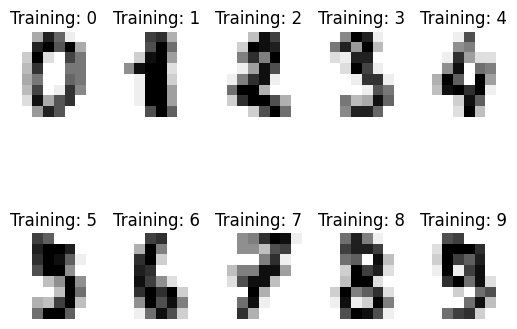

In [36]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[0:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

#3. Create and train (fit) a UMAP-reducer, then transform and visualise your data

In [37]:
# Create a new umap object
reducer = umap.UMAP(random_state=None)
# Fit (train) the reducer.
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)

We plot the embedding space and the target data (remember we have used unsupervised learning so the targets where never used in training).

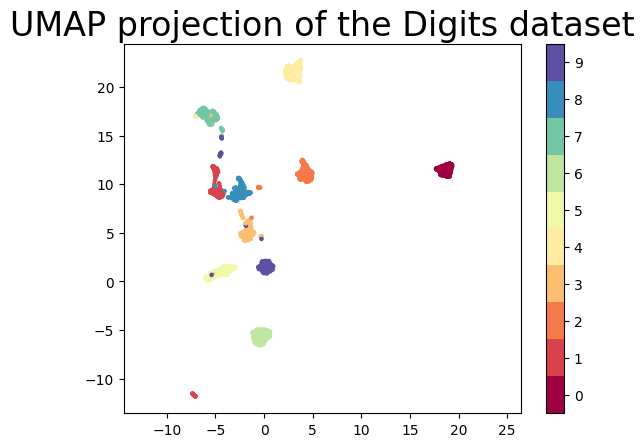

In [38]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

#4. Calculate the cosine-similarity

4.1 Calculate the "mean image" per class

In [39]:
mean_imgs = np.array([digits.data[digits.target==i].mean(axis=0) for i in range(10)])

 4.2-4.3 Calculate the cosine similarity matrix of the normalised raw data and mean image matrices.

In [40]:
similarities = []
for i in range(len(digits.data)):
  cosine_values = []
  X = digits.data[i]
  L2_X = np.linalg.norm(X,ord=2)
  for j in range(10):
    Y = mean_imgs[j]
    L2_Y = np.linalg.norm(Y,ord=2)
    cosine_values.append(np.dot(X,Y)/(L2_X*L2_Y))
  similarities.append(cosine_values)
similarities = np.array(similarities)

""" Nice to do this by hand, but I think np.linalg.norm(digits.data, axis=1, keepdims=True) does the same """

4.4 Plot the closest and "furthest" sample (images) for each class

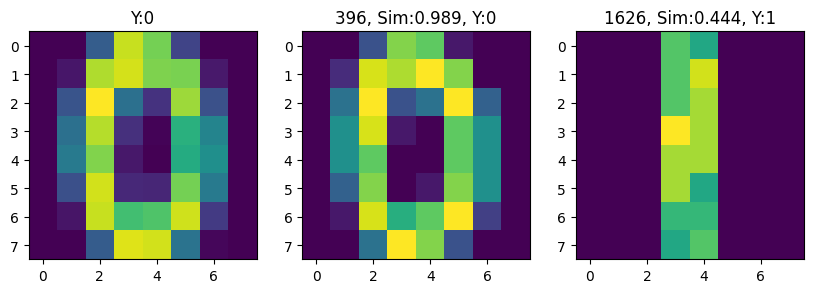

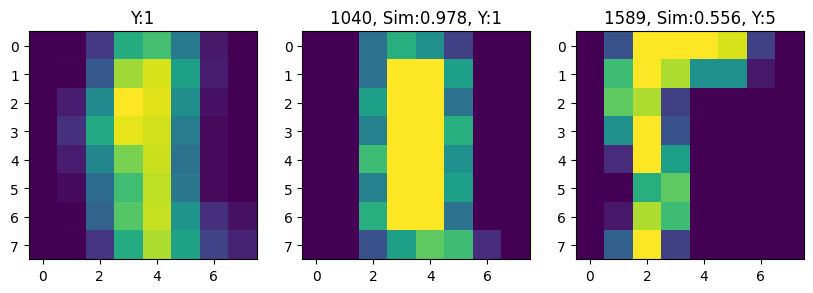

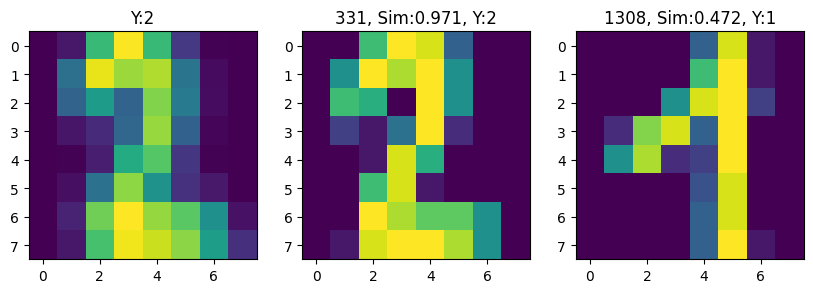

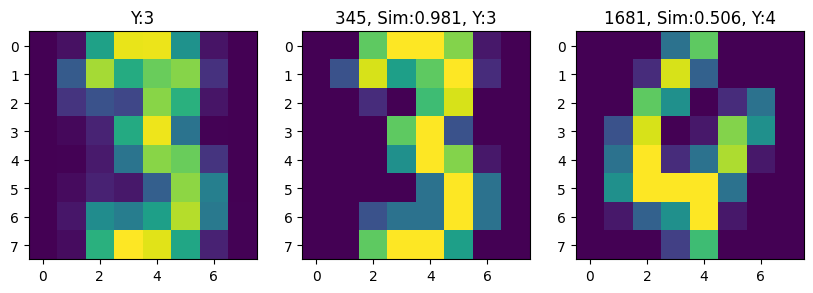

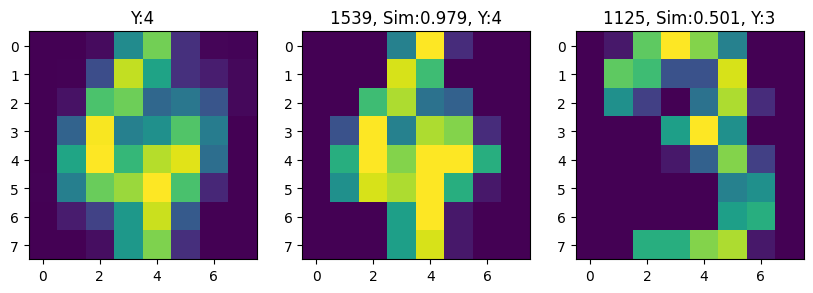

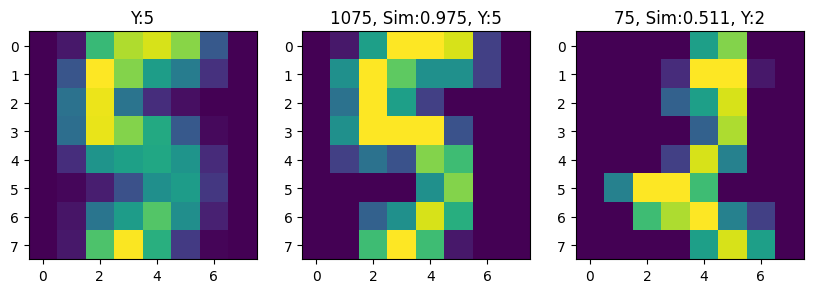

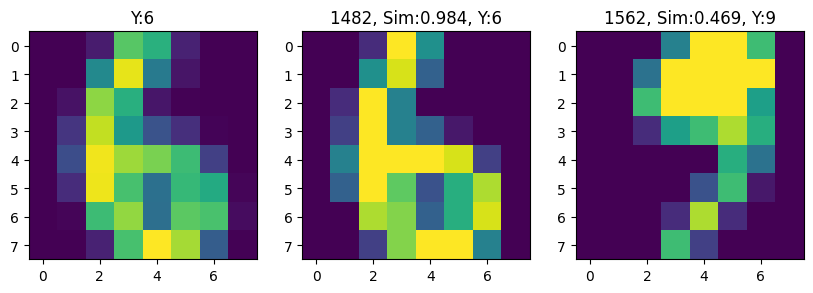

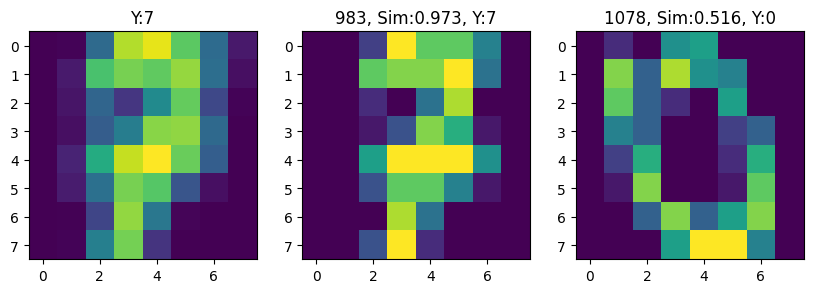

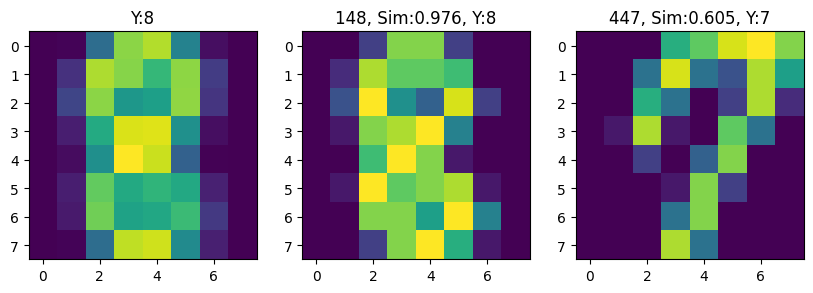

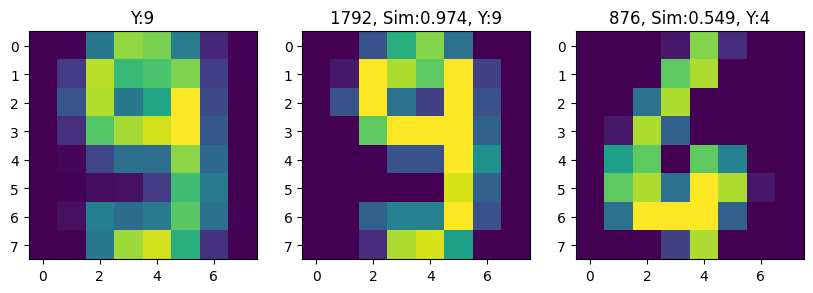

In [41]:
for i in range(0, 10):

    min_idx = np.argmin(similarities[:,i])
    max_idx = np.argmax(similarities[:,i])

    fig, axs = plt.subplots(1,3,figsize=(10,10))

    # reference image
    axs[0].set_title("Y:"f"{i}")
    axs[0].imshow(mean_imgs[i].reshape(8,8))

    # image and data with highest similarity to reference
    axs[1].set_title(f"{max_idx}, Sim:{similarities[max_idx, i]:.3f}, Y:{digits.target[max_idx]}")
    axs[1].imshow(digits.data[max_idx].reshape(8,8))

    # image and data with lowest similarity to reference
    axs[2].set_title(f"{min_idx}, Sim:{similarities[min_idx, i]:.3f}, Y:{digits.target[min_idx]}")
    axs[2].imshow(digits.data[min_idx].reshape(8,8))
plt.show()

#5. Split your data into 70% training data (features and labels), and 30% test data

In [42]:
num_examples = len(digits.data)

In [43]:
num_split = int(0.7*num_examples)

In [44]:
train_features = digits.data[:num_split]
train_labels =  digits.target[:num_split]
test_features = digits.data[num_split:]
test_labels = digits.target[num_split:]

In [45]:
print("Number of training examples: ",len(train_features))
print("Number of test examples: ",len(test_features))
print("Number of total examples:", len(train_features)+len(test_features))

""" Tip: Use train_test_split() """

Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


#6. Process the data with a k-NN classifier

6.1 Set up a k-NN classifier using sklearn

In [46]:
from sklearn import neighbors

In [47]:
classifier = neighbors.KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute')

6.2 Train(Fit) the model

In [48]:
classifier.fit(train_features, train_labels)

KNeighborsClassifier(algorithm='brute')

6.3 Get predictions for the test data,get the five nearest neighbors and vizualise them.

In [64]:
predicted_labels = classifier.predict(test_features)

()

In [84]:
distances, neighbors = classifier.kneighbors(test_features)
neighbors[0][1]

array([ 353,  817,  297,  366, 1254])

Text(0.5, 1.0, 'Predicted label:6')

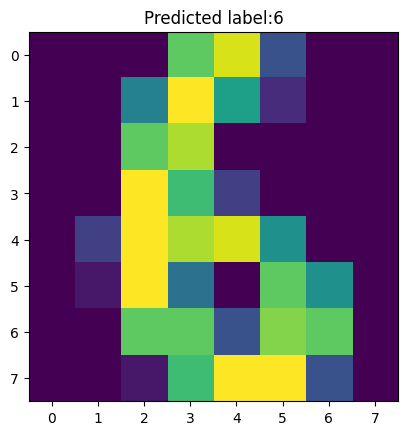

In [92]:
# Plot the predicted label
index = 4
plt.imshow(test_features[index].reshape(8, 8))
plt.title(f"Predicted label:{predicted_labels[index]}")

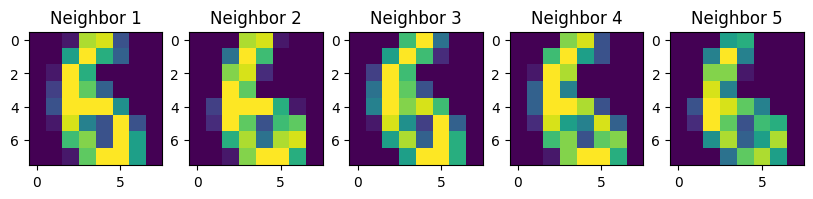

In [93]:
fig, axs = plt.subplots(1, 5, figsize=(10, 10))
for i in range(5):
    axs[i].set_title(f'Neighbor {i + 1}')
    axs[i].imshow(train_features[neighbors[index][i]].reshape(8,8))
plt.show()


""" Neat! """

6.4 Evaluate the classifier with sklearn metric tools.

In [ ]:
classification_report = metrics.classification_report(test_labels, predicted_labels)

In [ ]:
confusion_matrix = metrics.confusion_matrix( test_labels, predicted_labels)

In [ ]:
print("Classification report for ", classifier ,"\n\n",  classification_report, "\n Confusion matrix: \n\n", confusion_matrix)

Classification report for  KNeighborsClassifier(algorithm='brute') 

               precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      0.98      0.96        53
           2       0.98      0.96      0.97        53
           3       0.96      0.92      0.94        53
           4       0.98      0.96      0.97        57
           5       0.95      0.98      0.96        56
           6       0.98      1.00      0.99        54
           7       0.95      1.00      0.97        54
           8       0.96      0.90      0.93        52
           9       0.96      0.95      0.95        55

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540
 
 Confusion matrix: 

 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  1]
 [ 1  0 51  1  0  0  0  0  0  0]
 [ 0  0  1 49  0  1  0  1  1  0]
 [ 0  0  0  0 55

#7. Cluster the data with k-Means

7.1 Set up k-Means instance

In [ ]:
from sklearn import cluster

In [ ]:
clustering = cluster.KMeans(n_clusters = 10)

7.2 Apply the clustering approach

In [ ]:
clusters= clustering.fit(train_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7.3 Vizualise the found cluster centers

In [ ]:
centers = clustering.cluster_centers_

In [1]:
for i in range(0, 10):
  plt.imshow(centers[i].reshape(8,8))
  plt.title("Center index: " f"{i}")
  plt.show()

""" The cluster centers are vizualized but I don't see the comparison to UMAP, maybe you did this by word
and will explain it to the TA """

SyntaxError: EOF while scanning triple-quoted string literal (4110101003.py, line 6)

7.4-5 Make predictions on the the test data, and use the evaluation tools

In [ ]:
predicted_labels = clustering.predict(test_features)

In [ ]:
metrics.completeness_score(test_labels, predicted_labels)

0.7436387231183219

In [ ]:
metrics.homogeneity_score(test_labels, predicted_labels)

0.730397671109016

In [ ]:
metrics.adjusted_mutual_info_score(test_labels, predicted_labels)

0.7274956519957565

In [ ]:
""" Reasonable numbers! """
""" Compared to our project I would say this group has occasionally easier code at the cost
    of better visualization. It's a trade off and I won't judge which is better :) """